In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# STEP1 import the data

In [3]:
df = pd.read_csv("car_done.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              157 non-null    int64  
 1   Manufacturer            157 non-null    object 
 2   Model                   157 non-null    object 
 3   Sales_in_thousands      157 non-null    float64
 4   four_year_resale_value  121 non-null    float64
 5   Vehicle_type            157 non-null    object 
 6   Price_in_thousands      155 non-null    float64
 7   Engine_size             156 non-null    float64
 8   Horsepower              156 non-null    float64
 9   Wheelbase               156 non-null    float64
 10  Width                   156 non-null    float64
 11  Length                  156 non-null    float64
 12  Curb_weight             155 non-null    float64
 13  Fuel_capacity           156 non-null    float64
 14  Fuel_efficiency         154 non-null    fl

In [5]:
# step 2 for data cleaning 
# 1. check for null values 
# 2. fill null values  
# 3. remove duplicates 
# 4. remove unwanted columns

In [6]:
# check for null values 
df.isnull().sum()

Unnamed: 0                 0
Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [7]:
# return the value count of the column
df["four_year_resale_value"].value_counts()

four_year_resale_value
18.225    2
12.025    2
7.750     2
16.575    2
16.360    1
         ..
34.080    1
11.425    1
13.240    1
16.725    1
13.760    1
Name: count, Length: 117, dtype: int64

In [8]:
print("Median",df["four_year_resale_value"].median())
print(df["four_year_resale_value"].describe())

Median 14.18
count    121.000000
mean      18.072975
std       11.453384
min        5.160000
25%       11.260000
50%       14.180000
75%       19.875000
max       67.550000
Name: four_year_resale_value, dtype: float64


In [9]:
# treatment of null values 
df["four_year_resale_value"].fillna(value = 14.18,inplace= True)

In [10]:
df.ffill(inplace = True)

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
# return the no. of duplicated values 
df.duplicated().sum()

np.int64(0)

In [13]:
# remove duplicates 
df.drop_duplicates(inplace = True )

In [14]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Sales_in_thousands',
       'four_year_resale_value', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor'],
      dtype='object')

In [15]:
# return each column's no. of unique values 
df.nunique()

Unnamed: 0                157
Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    117
Vehicle_type                2
Price_in_thousands        152
Engine_size                31
Horsepower                 66
Wheelbase                  88
Width                      78
Length                    127
Curb_weight               147
Fuel_capacity              55
Fuel_efficiency            20
Latest_Launch             130
Power_perf_factor         154
dtype: int64

In [16]:
# return all unique valeus 
df["Unnamed: 0"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156])

In [17]:
df.drop(columns = "Unnamed: 0",inplace=True)

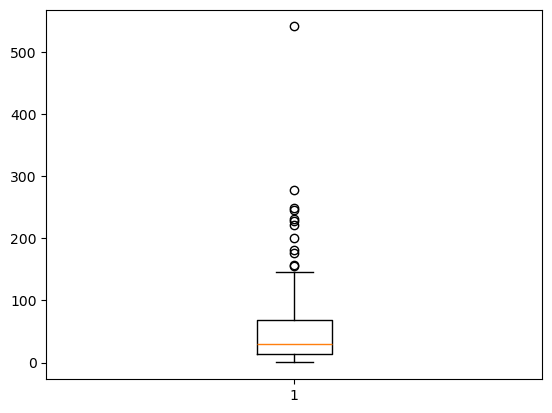

In [26]:
plt.boxplot(df["Sales_in_thousands"])
plt.show()

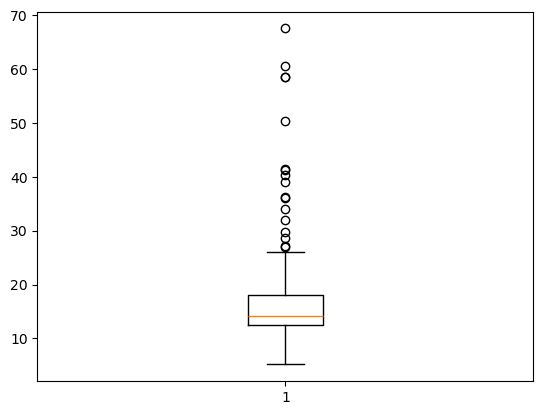

In [27]:
plt.boxplot(df["four_year_resale_value"])
plt.show()

In [28]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    LF = q1-(1.5*iqr)
    UF = q3+(1.5*iqr)
    print("LF-->",LF)
    print("UF-->",UF)

In [35]:
IQR(df["Curb_weight"])

LF--> 1.706
UF--> 5.09


In [ ]:
df["Curb_weight"] = np.where(df["Curb_weight"]>5.09,5.09,df["Curb_weight"])

In [30]:
df["Sales_in_thousands"] = np.where(df["Sales_in_thousands"]>148.719,148.719,
                                   df["Sales_in_thousands"])

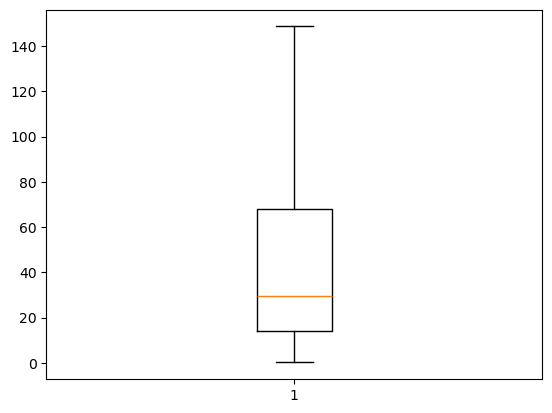

In [31]:
plt.boxplot(df["Sales_in_thousands"])
plt.show()

In [54]:
IQR(df["Length"])

LF--> 149.7
UF--> 224.09999999999997


In [55]:
df["four_year_resale_value"] = np.where(df["four_year_resale_value"]>26.5,26.5,df["four_year_resale_value"])
df["Price_in_thousands"] = np.where(df["Price_in_thousands"]>52.60,52.60,df["Price_in_thousands"])
df["Fuel_capacity"] = np.where(df["Fuel_capacity"]>25.04,25.04,df["Fuel_capacity"])
df["Fuel_efficiency"] = np.where(df["Fuel_efficiency"]>33.5,33.5,df["Fuel_efficiency"])
df["Power_perf_factor"] = np.where(df["Power_perf_factor"]>134.43,134.43,df["Power_perf_factor"])
df["Engine_size"] = np.where(df["Engine_size"]>5.3,5.3,df["Engine_size"])
df["Horsepower"] = np.where(df["Horsepower"]>312.5,312.5,df["Horsepower"])
df["Length"] = np.where(df["Length"]>224.099,224.099,df["Length"])
df["Length"] = np.where(df["Length"]<149.7,149.7,df["Length"])
df["Wheelbase"] = np.where(df["Wheelbase"]>126,126,df["Wheelbase"])
df["Width"] = np.where(df["Width"]>81.14,81.14,df["Width"])
df["Curb_weight"] = np.where(df["Curb_weight"]>5.09,5.09,df["Curb_weight"])

In [51]:
y= df.select_dtypes(include=[int,float])

In [56]:
import seaborn as sns
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show() 

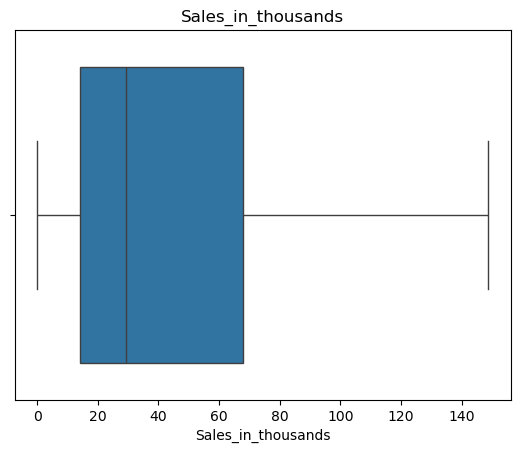

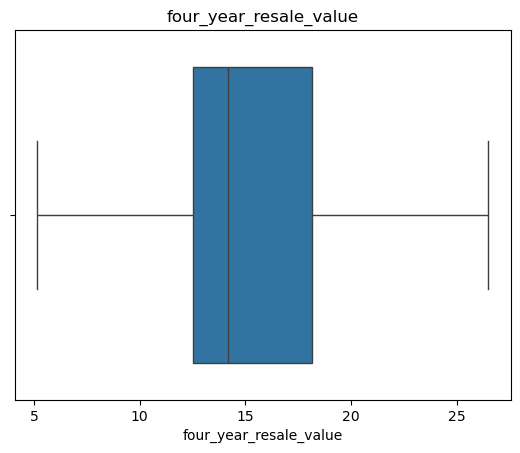

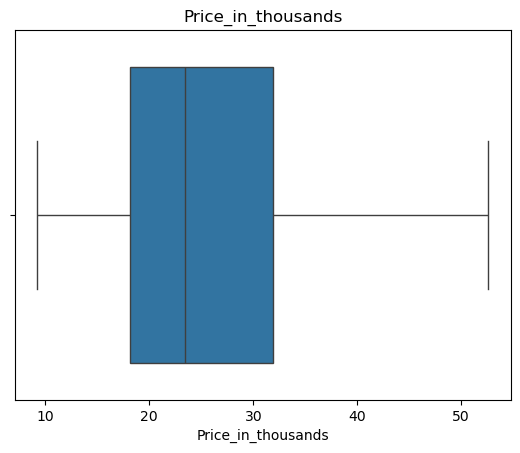

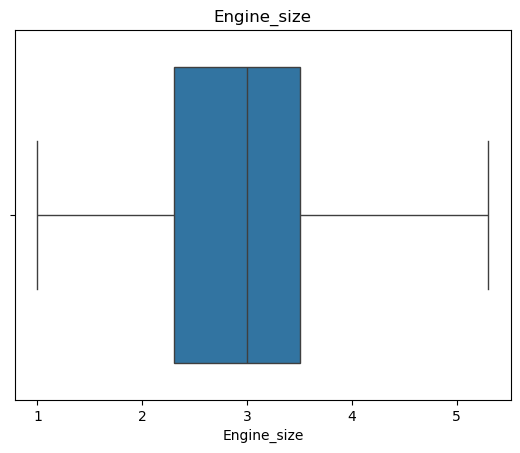

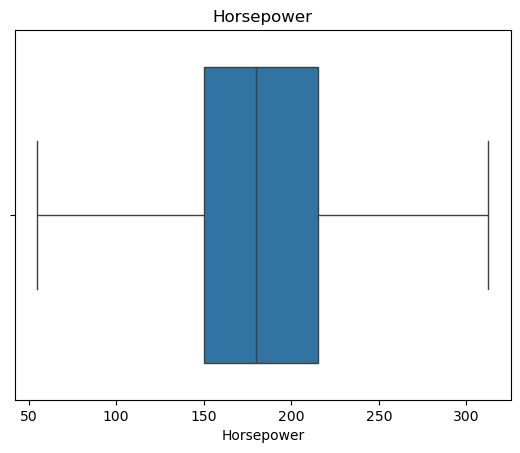

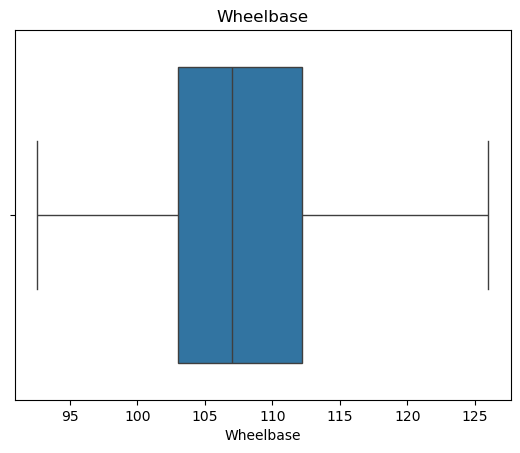

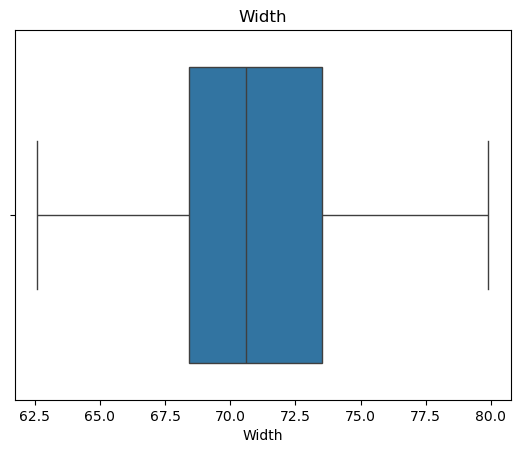

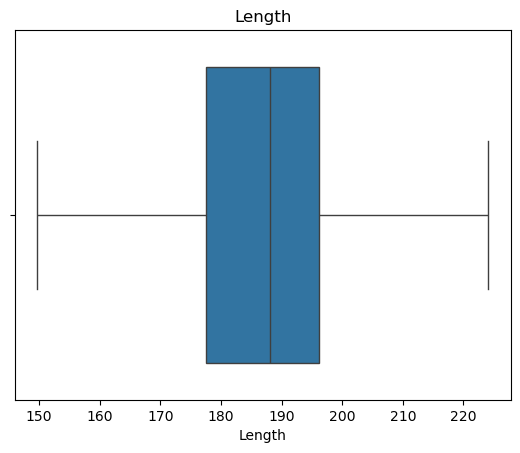

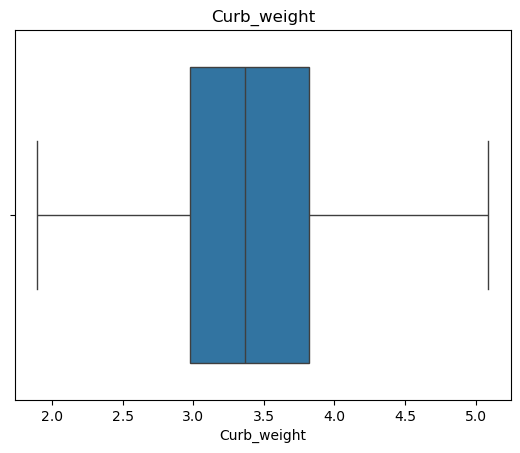

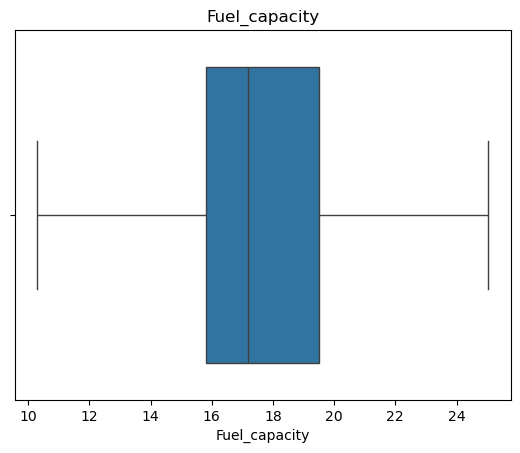

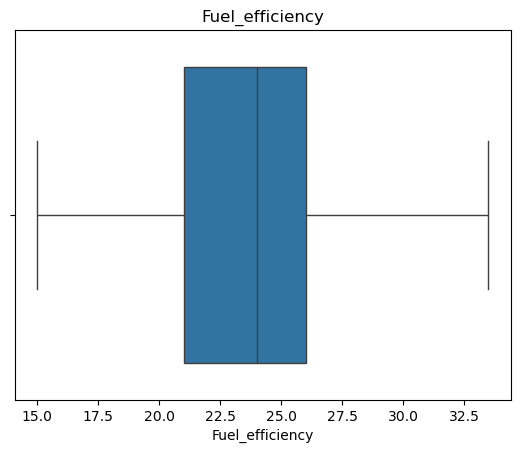

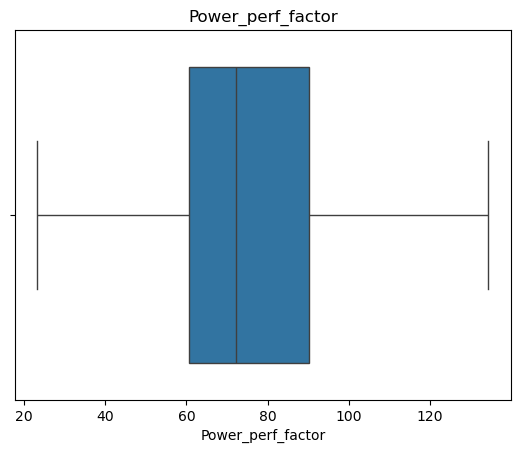

In [57]:
outliers(df)

In [72]:
num = df.select_dtypes(include=[int,float])

In [73]:
num.corr()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.331530,-0.437124,-0.031457,-0.293391,0.221470,0.074261,0.187580,-0.061319,0.017602,0.070766,-0.327238
four_year_resale_value,-0.331530,1.000000,0.750408,0.497379,0.670396,0.134316,0.267359,0.188018,0.463911,0.421095,-0.430312,0.699987
Price_in_thousands,-0.437124,0.750408,1.000000,0.641975,0.868308,0.205822,0.383372,0.209259,0.605459,0.512977,-0.547811,0.913599
Engine_size,-0.031457,0.497379,0.641975,1.000000,0.814858,0.541113,0.713367,0.596015,0.815234,0.719926,-0.762730,0.797236
Horsepower,-0.293391,0.670396,0.868308,0.814858,1.000000,0.356812,0.555335,0.443303,0.663417,0.567606,-0.615572,0.993709
Wheelbase,0.221470,0.134316,0.205822,0.541113,0.356812,1.000000,0.692742,0.844443,0.684815,0.671038,-0.498822,0.323398
Width,0.074261,0.267359,0.383372,0.713367,0.555335,0.692742,1.000000,0.712166,0.726498,0.634051,-0.592866,0.525455
Length,0.187580,0.188018,0.209259,0.596015,0.443303,0.844443,0.712166,1.000000,0.639726,0.578512,-0.419239,0.396743
Curb_weight,-0.061319,0.463911,0.605459,0.815234,0.663417,0.684815,0.726498,0.639726,1.000000,0.877190,-0.834897,0.657205
Fuel_capacity,0.017602,0.421095,0.512977,0.719926,0.567606,0.671038,0.634051,0.578512,0.877190,1.000000,-0.828401,0.566061


<Axes: >

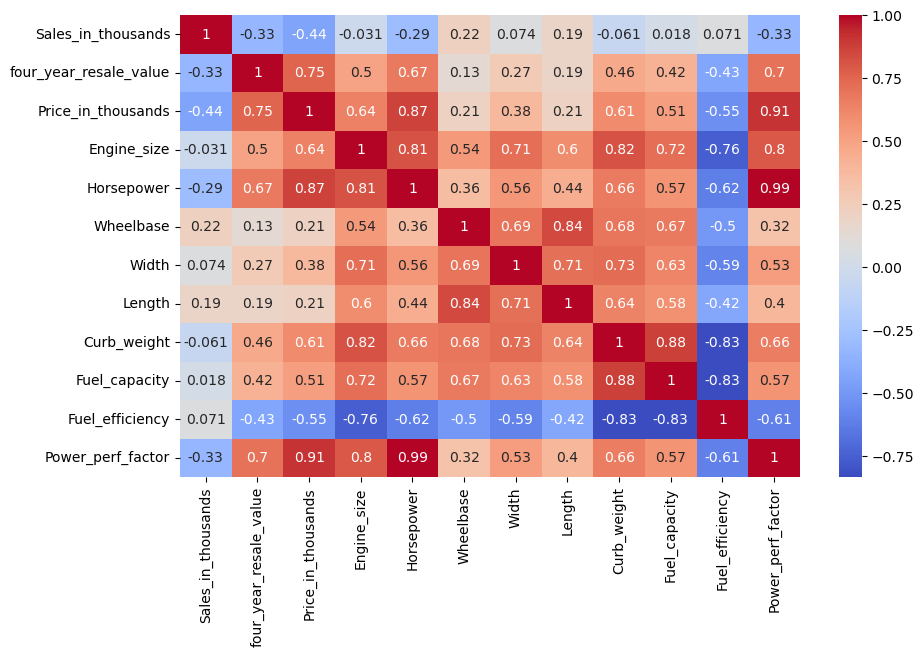

In [78]:
# to create a correlation heatmap you must use only numerical data
plt.figure(figsize=(10,6))
sns.heatmap(num.corr(),annot=True,cmap="coolwarm")

In [82]:
plt.scatter(df["Engine_size"],df["Fuel_efficiency"])
plt.xlabel("Engine")
plt.ylabel("Fuel")
plt.show()

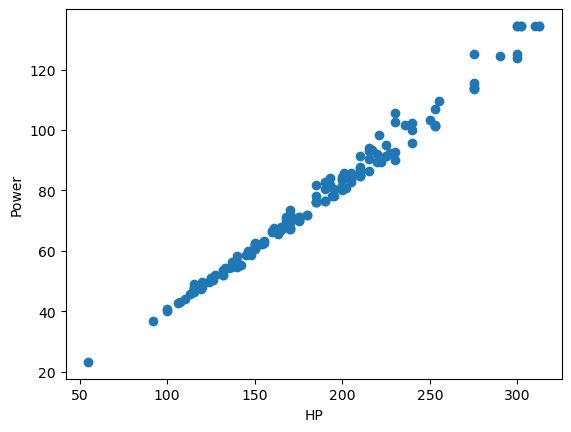

In [79]:
plt.scatter(df["Horsepower"],df["Power_perf_factor"])
plt.xlabel("HP")
plt.ylabel("Power")
plt.show()

In [84]:
df.select_dtypes(object).columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [94]:
df["Manufacturer"].nunique()

30

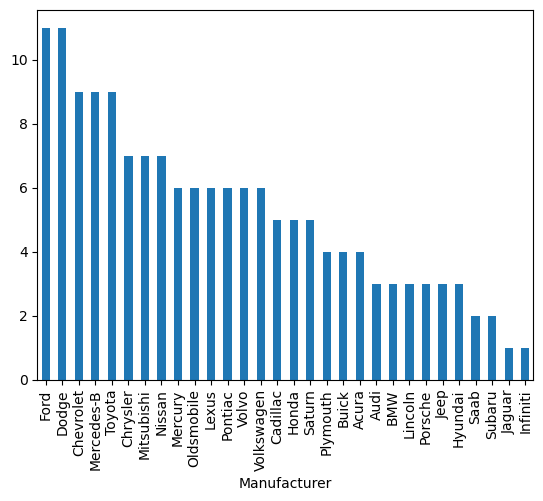

In [87]:
df["Manufacturer"].value_counts().plot.bar()
plt.show()

In [95]:
df["Vehicle_type"].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [96]:
df["Vehicle_type"] = np.where(df["Vehicle_type"]=="Car",1,0)

In [97]:
df["Vehicle_type"].value_counts()

Vehicle_type
0    116
1     41
Name: count, dtype: int64

In [98]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [99]:
X = df[['four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']]
y = df["Sales_in_thousands"]

<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

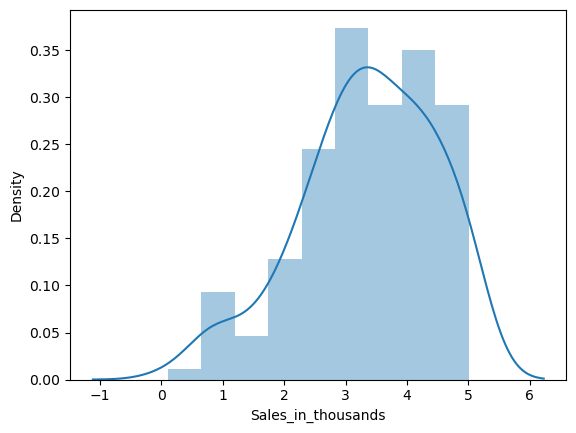

In [143]:
sns.distplot(np.log1p(df["Sales_in_thousands"]))

In [101]:
# check if there is any text column or not if any so remove it
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   four_year_resale_value  157 non-null    float64
 1   Vehicle_type            157 non-null    int64  
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Width                   157 non-null    float64
 7   Length                  157 non-null    float64
 8   Curb_weight             157 non-null    float64
 9   Fuel_capacity           157 non-null    float64
 10  Fuel_efficiency         157 non-null    float64
 11  Power_perf_factor       157 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.8 KB


In [102]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=88)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr = LinearRegression()

In [135]:
# model fitting 
lr.fit(X_train,y_train)

LinearRegression()

In [136]:
print("R_square",lr.score(X_train,y_train))

R_square 0.4169014224842996


In [144]:
X = df[['four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']]
y = np.log1p(df["Sales_in_thousands"])

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=88)

In [146]:
l1 = LinearRegression()

In [147]:
l1.fit(X_train,y_train)


LinearRegression()

In [148]:
print("R_square",l1.score(X_train,y_train))

R_square 0.5273957530827337


In [155]:
from sklearn.metrics import mean_squared_error,r2_score

In [169]:
actual = np.exp(y_train)
pred = np.exp(l1.predict(X_train))
error = actual - pred
MSE = np.mean(np.square(error))
RMSE = np.sqrt(MSE)

In [170]:
print("MSE",MSE)
print("RMSE",RMSE)

MSE 1123.4610579456748
RMSE 33.518070617887226


In [171]:
from sklearn.metrics import root_mean_squared_error

In [173]:
print("mean_Sq_er",mean_squared_error(actual,pred))
print("RMSE",root_mean_squared_error(actual,pred))

mean_Sq_er 1123.4610579456748
RMSE 33.518070617887226


1123.4610579456748

In [175]:
np.random.seed(0)
np.random.randint(1,10,3)

array([6, 1, 4], dtype=int32)